In [1]:
import pandas as pd
import numpy as np
import sympy
from sympy.solvers.inequalities import reduce_rational_inequalities,reduce_inequalities
from itertools import chain
from collections import defaultdict
from IPython.display import display

from sympy.parsing.sympy_parser import parse_expr
from sympy.parsing.sympy_parser import standard_transformations
from sympy.printing.mathml import print_mathml
import math
from IPython.display import display, Markdown, Latex
import os

import seaborn as sns
import matplotlib.pyplot as plt

def make_symbols_positive(sym):
    return sympy.symbols("{}".format(sym),positive =True)

def make_symbols_function(sym):
    return sympy.symbols("{}".format(sym),cl)

def subs_function(target,list_):
    return sympy.simplify(target.subs(list_))

def root_cal(value):
    return value**(1/2)

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + 'Hello World !' + color.END)

Hello World !


# w_range

In [3]:
def sol_w_same(df_1,target_):
    w_sol = sympy.solve([df_1["QD"][target_]-df_1["FB"][target_]],w)
    return w_sol

In [4]:
def sol_w_other(df_1,equa):
    w_sol = sympy.solve(equa,w)
    return w_sol

In [5]:
def display_solve(df_1,w_sol):
    for row,col in df_1.iterrows():
        print(row)
        try:
            display(col["QD"].subs([(w,w_sol)]).factor())
        except:
            print()
        print()

In [6]:
def display_solve2(df_1,w_sol):
    for row,col in df_1.iterrows():
        print(row)
        try:
            display(col["QD"].subs([(w,w_sol)]).simplify())
        except:
            print()
        print()

In [7]:
def display_w_insert(df_,w_1):
    order_ = ["w","epsilon","t","p","q_nd","q_t","q","profit_r","profit_s","profit_all","h1_r_p","h1_s_w","h1_s_e"]
    if w_1 == "WH":
        for ord_ in order_:
            try:
                value_ = df_[1][ord_].factor()
                value_2 = df_[1][ord_].simplify()
                print(color.RED + ord_ + color.END)
                display("factor: ",value_)
                display("simplify: ",value_2)
                print("-"*40)
            except:
                print(color.RED + ord_ + color.END)
                print("-"*40)
    else:
        for ord_ in order_:
            try:
                value_ = df_[1][ord_].subs([(w,w_1)]).factor()
                value_2 = df_[1][ord_].subs([(w,w_1)]).simplify()
                print(color.RED + ord_ + color.END)
                display("factor: ",value_)
                display("simplify: ",value_2)
                print("-"*40)
            except:
                print(color.RED + ord_ + color.END)
                print("-"*40)

In [8]:
Path_ = r"C:\Users\Samsung\jupyter\Graduation_thesis\result\version_total_3"

In [9]:
file_list = os.listdir(Path_)
file_list_xlsx = [f for f in file_list if f.endswith(".xlsx")]
#file_FB = [f for f in file_list_xlsx if f.contains("FB")]
#file_WH = [f for f in file_list_xlsx if f.contains("WH")]
#file_QD = [f for f in file_list_xlsx if f.contains("QD")]

In [10]:
file_name = [li.replace(".xlsx","") for li in file_list_xlsx]
file_name

['KN_BD_FB',
 'KN_BD_QD',
 'KN_BD_WH',
 'KN_BS_FB',
 'KN_BS_QD',
 'KN_BS_WH',
 'KN_DD_FB',
 'KN_DD_QD',
 'KN_DD_WH',
 'KN_SD_FB',
 'KN_SD_QD',
 'KN_SD_WH',
 'ND_FB',
 'ND_QD',
 'ND_WH',
 'UN_BD_QD',
 'UN_BD_WH',
 'UN_BS_QD',
 'UN_BS_WH',
 'UN_DD_QD',
 'UN_DD_WH',
 'UN_SD_QD',
 'UN_SD_WH']

In [11]:
for fn in file_name:
    path_ = Path_ + "\\{}.xlsx"
    globals() ["{}".format(fn)] = pd.read_excel(path_.format(fn),index_col=0,header=None)
    try:
        globals() ["{}".format(fn)] = globals() ["{}".format(fn)]#.rename(index={"profit_all":"pro_all"})
    except:
        pass

In [12]:
p,w,c,s,alpha,beta,delta_d,delta_s,epsilon,psi = make_symbols_positive("p,w,c,s,alpha,beta,delta_d,delta_s,epsilon,psi")

In [13]:
parse_dic = {"p":p,"w":w,"c":c,"s":s
             ,"alpha":alpha,"beta":beta
             ,"delta_d":delta_d,"delta_s":delta_s,"epsilon":epsilon }

In [14]:
for fn in file_name:
    globals() ["{}".format(fn)][1] = globals() ["{}".format(fn)][1].map(lambda x: parse_expr(x.replace("^","**").replace("lambda","lambda_"),parse_dic))

# Un cases

In [15]:
solve_ws = sympy.solve((ND_QD[1]["profit_s"]-ND_WH[1]["profit_s"]).factor(),w)
w_w = solve_ws[1]
w_w

(-alpha + 2*beta*c + sqrt(2)*(alpha - beta*c))/beta

In [16]:
solve_w = sympy.solve((ND_QD[1]["profit_all"]-ND_FB[1]["profit_all"]).factor(),w)
w_c = solve_w[0]
w_c

alpha/beta

# 1. DD case

In [17]:
time_ = "UN"
dis_ = "DD"


tar_wh = globals() ["{}_{}_WH".format(time_,dis_)]
tar_qd = globals() ["{}_{}_QD".format(time_,dis_)]



In [18]:

globals() ["{}_{}_QD{}".format(time_,dis_,"W")] = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_w)]).factor()))  
globals() ["{}_{}_QD{}".format(time_,dis_,"C")] = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_c)]).factor()))  


In [19]:
time_ = "UN"
diss_ = ["DD","SD","BD","BS"]

for dis_ in diss_:
    tar_wh = globals() ["{}_{}_WH".format(time_,dis_)]
    tar_qd = globals() ["{}_{}_QD".format(time_,dis_)]
    globals() ["{}_{}_QD{}".format(time_,dis_,"W")] = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_w)]).factor()))  
    globals() ["{}_{}_QD{}".format(time_,dis_,"C")] = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_c)]).factor()))  

In [20]:
UN_BD_QDW

,1
0,
p,-(-alpha + beta*s)/(2*beta)
w,-(-sqrt(2)*alpha + alpha - 2*beta*c + sqrt(2)*...
epsilon,sqrt(2)*(-4 + 3*sqrt(2))/(2*beta)
q_d,-(alpha + beta*s)*(delta_d - 1)/2
q_nd,-sqrt(2)*(-alpha + beta*c)/4
q_t,sqrt(2)*(-alpha + beta*c)*(delta_s - 1)/4
t,-(-sqrt(2)*alpha - 4*beta*c + sqrt(2)*beta*c)/...
profit_r,-(2*alpha**2*delta_d - alpha**2*delta_s - alph...
profit_s,-(-alpha + beta*c)**2*(delta_s - 1)/(8*beta)


In [21]:
UN_BD_QDW[1]["profit_r"]

-(2*alpha**2*delta_d - alpha**2*delta_s - alpha**2 - 2*sqrt(2)*alpha*beta*c*delta_s + 2*alpha*beta*c*delta_s - 2*alpha*beta*c + 2*sqrt(2)*alpha*beta*c + 4*alpha*beta*delta_d*s - 2*sqrt(2)*alpha*beta*delta_s*s - 4*alpha*beta*s + 2*sqrt(2)*alpha*beta*s - beta**2*c**2*delta_s + 2*sqrt(2)*beta**2*c**2*delta_s - 2*sqrt(2)*beta**2*c**2 + beta**2*c**2 + 2*sqrt(2)*beta**2*c*delta_s*s - 2*sqrt(2)*beta**2*c*s + 2*beta**2*delta_d*s**2 - 2*beta**2*s**2)/(8*beta)

In [22]:
eq_ = (UN_BS_QDW[1]["profit_r"]-UN_BS_QDC[1]["profit_r"]).factor()
s_up = sympy.solve(eq_,s)[0]
s_up

(alpha - 2*sqrt(2)*beta*c + 3*beta*c)/(2*beta*(2 - sqrt(2)))

In [23]:
eq_ = (UN_BS_WH[1]["profit_r"]-UN_BS_QDC[1]["profit_r"]).factor()
s_down = sympy.solve(eq_,s)[0]
s_down

(alpha + beta*c)/(2*beta)

In [24]:
## Demand disruption

n_d = 0.5
n_s = 0.3
#s_ = 

para_ = [(alpha,1200),(beta,7),(c,50),(delta_d,n_d),(delta_s,n_s)]

s_up_d = s_up.subs(para_).factor().simplify()
s_down_d = s_down.subs(para_).factor().simplify()

In [25]:
float(s_up_d)

153.64576885775466

In [26]:
float(s_down_d)

110.71428571428571

In [27]:
#s_ = float(-s_up_d) - 0.0001
s_ = float(-s_down_d)
#s_ = 110
para_ = [(alpha,1200),(beta,7),(c,50),(delta_d,n_d),(delta_s,n_s),(s,s_)]


time_ = "UN"
diss_ = ["DD","BD"]

for dis_ in diss_:
    tar_wh = globals() ["{}_{}_WH".format(time_,dis_)]
    tar_qdc = globals() ["{}_{}_QDC".format(time_,dis_)]
    tar_qdw = globals() ["{}_{}_QDW".format(time_,dis_)]
    
    
    globals() ["{}_{}_WH_N".format(time_,dis_)] = pd.DataFrame(tar_wh[1].map(lambda x : x.subs(para_).simplify()))  
    globals() ["{}_{}_QDW_N".format(time_,dis_)] = pd.DataFrame(tar_qdw[1].map(lambda x : x.subs(para_).simplify()))  
    globals() ["{}_{}_QDC_N".format(time_,dis_)] = pd.DataFrame(tar_qdc[1].map(lambda x : x.subs(para_).simplify()))  

In [28]:
float(UN_BD_WH_N[1]["profit_r"])

3225.4464285714257

In [29]:
float(UN_BD_QDW_N[1]["profit_r"])

6966.31266375345

In [30]:
float(UN_BD_QDC_N[1]["profit_r"])

3225.4464285714266

In [31]:
float(UN_BD_QDC_N[1]["profit_r"]) - float(UN_BD_QDW_N[1]["profit_r"])

-3740.866235182023

In [32]:
float(UN_BD_QDW_N[1]["profit_r"])

6966.31266375345

In [33]:
float(UN_BD_QDC_N[1]["profit_r"])

3225.4464285714266

In [34]:
float(UN_BD_QDC_N[1]["profit_r"]) - float(UN_BD_QDW_N[1]["profit_r"])

-3740.866235182023

In [35]:
float(UN_BD_QDW_N[1]["profit_r"])

6966.31266375345

In [36]:
float(UN_BD_QDC_N[1]["profit_r"])

3225.4464285714266

In [37]:
float(UN_BD_QDC_N[1]["profit_r"]) - float(UN_BD_QDW_N[1]["profit_r"])

-3740.866235182023

In [140]:
## Supply disruption

n_d = 0.3
n_s = 0.6
#s_ = 

para_ = [(alpha,1200),(beta,7),(c,50),(delta_d,n_d),(delta_s,n_s)]

s_up_d = s_up.subs(para_).factor().simplify()
s_down_d = s_down.subs(para_).factor().simplify()

In [141]:
float(s_up_d)

153.64576885775466

In [142]:
float(s_down_d)

110.71428571428571

In [153]:
#s_ = float(-s_up_d) - 0.0001
s_ = float(-s_down_d)
#s_ = 110
para_ = [(alpha,1200),(beta,7),(c,50),(delta_d,n_d),(delta_s,n_s),(s,s_)]


time_ = "UN"
diss_ = ["DD","BD"]

for dis_ in diss_:
    tar_wh = globals() ["{}_{}_WH".format(time_,dis_)]
    tar_qdc = globals() ["{}_{}_QDC".format(time_,dis_)]
    tar_qdw = globals() ["{}_{}_QDW".format(time_,dis_)]
    
    
    globals() ["{}_{}_WH_N".format(time_,dis_)] = pd.DataFrame(tar_wh[1].map(lambda x : x.subs(para_).simplify()))  
    globals() ["{}_{}_QDW_N".format(time_,dis_)] = pd.DataFrame(tar_qdw[1].map(lambda x : x.subs(para_).simplify()))  
    globals() ["{}_{}_QDC_N".format(time_,dis_)] = pd.DataFrame(tar_qdc[1].map(lambda x : x.subs(para_).simplify()))  

# SD

In [171]:
def s_para_display(n_d,n_s):

    para_ = [(alpha,1200),(beta,7),(c,50),(delta_d,n_d),(delta_s,n_s)]

    s_up_d = s_up.subs(para_).factor().simplify()
    s_down_d = s_down.subs(para_).factor().simplify()
    display(s_down,float(s_down_d))
    display(s_up,float(s_up_d))


In [184]:
def s_para(n_d,n_s):

    para_ = [(alpha,1200),(beta,7),(c,50),(delta_d,n_d),(delta_s,n_s)]

    s_up_d = s_up.subs(para_).factor().simplify()
    s_down_d = s_down.subs(para_).factor().simplify()
    return float(s_down_d),float(s_up_d)

In [185]:
c

(110.71428571428571, 153.64576885775466)

In [357]:
s_up

(alpha - 2*sqrt(2)*beta*c + 3*beta*c)/(2*beta*(2 - sqrt(2)))

In [ ]:
time_ = "UN"
dis_ = "SD"

n_d = 0.3
n_s = 0.6
s_ = 111
tar_ = "profit_r"

In [168]:

def tar_para(time_,dis_,tar_,n_d,n_s,s_):
    para_ = [(alpha,1200),(beta,7),(c,50),(delta_d,n_d),(delta_s,n_s),(s,s_)]

    tar_wh = globals() ["{}_{}_WH".format(time_,dis_)]
    tar_qdc = globals() ["{}_{}_QDC".format(time_,dis_)]
    tar_qdw = globals() ["{}_{}_QDW".format(time_,dis_)]


    wh_df = pd.DataFrame(tar_wh[1].map(lambda x : x.subs(para_).simplify()))  
    qdw_df = pd.DataFrame(tar_qdw[1].map(lambda x : x.subs(para_).simplify()))  
    qdc_df = pd.DataFrame(tar_qdc[1].map(lambda x : x.subs(para_).simplify()))

    return float(wh_df[1][tar_]),float(qdw_df[1][tar_]),float(qdc_df[1][tar_])

In [170]:
tar_para("UN","SD","profit_r",0.3,0.6,111)

(6414.607142857141, 8562.304463761642, 6438.892857142855)

In [ ]:
s_range = [s]

In [210]:
gap_ = 0.5

iter_1 = np.arange(0,50,gap_)
iter_2 = np.arange(50,s_para(0.3,0.6)[0],gap_)
iter_3 = np.arange(s_para(0.3,0.6)[0],s_para(0.3,0.6)[1],gap_)
iter_4 = np.arange(s_para(0.3,0.6)[1],s_para(0.3,0.6)[1]+42,gap_)
#iter_all = np.arange(0,s_para(0.3,0.6)[1]+42,gap_)

## SD

In [226]:
all_ = []
for s_can in iter_1:
    wh_can,qdw_can,qdc_can = tar_para("UN","SD","profit_r",0.3,0.6,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_1 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [227]:
all_ = []
for s_can in iter_2:
    wh_can,qdw_can,qdc_can = tar_para("UN","SD","profit_r",0.3,0.6,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_2 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [228]:
all_ = []
for s_can in iter_3:
    wh_can,qdw_can,qdc_can = tar_para("UN","SD","profit_r",0.3,0.6,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_3 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [229]:
all_ = []
for s_can in iter_4:
    wh_can,qdw_can,qdc_can = tar_para("UN","SD","profit_r",0.3,0.6,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_4 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [235]:
df_iter_all = pd.concat([df_iter_1,df_iter_2,df_iter_3,df_iter_4])

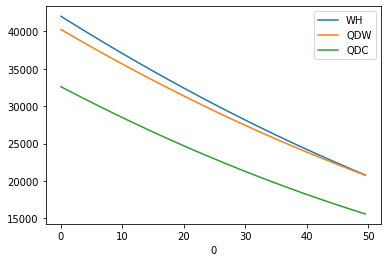

In [230]:
df_iter_1.plot()

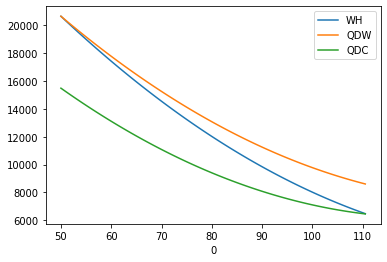

In [231]:
df_iter_2.plot()

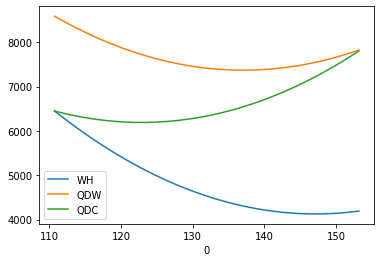

In [232]:
df_iter_3.plot()

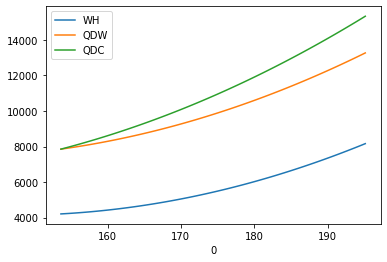

In [233]:
df_iter_4.plot()

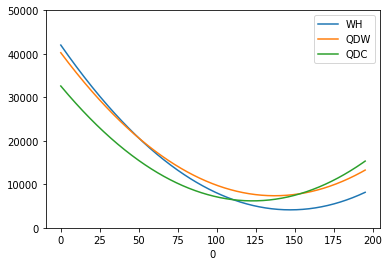

In [239]:
df_iter_all.plot(ylim=(0,50000))

In [47]:
UN_BD_QDC_N.loc["profit_r":"profit_s",1:]

,1
0,
profit_r,3225.44642857143
profit_s,18062.5000000000


In [50]:
pd.concat([UN_BD_QDC_N.loc["profit_r":"profit_s",1:],UN_BD_QDW_N.loc["profit_r":"profit_s",1:]],axis=1).plot()

,1,1
0,,
profit_r,3225.44642857143,-5805.80357142857 + 9031.25*sqrt(2)
profit_s,18062.5000000000,9031.25000000000


In [53]:
UN_BD_QDW_N.loc["profit_r":"profit_s",1:][1].map(lambda x: float(x))

0
profit_r    6966.312664
profit_s    9031.250000
Name: 1, dtype: float64

In [54]:
UN_BD_WH_N.loc["profit_r":"profit_s",1:][1].map(lambda x: float(x))

0
profit_r    3225.446429
profit_s    9031.250000
Name: 1, dtype: float64

## BS

In [337]:
gap_ = 1

d_ = 0.3
s_ = 0.9

iter_1 = np.arange(0,50,gap_)
iter_2 = np.arange(50,s_para(d_,s_)[0],gap_)
iter_3 = np.arange(s_para(d_,s_)[0],s_para(d_,s_)[1],gap_)
iter_4 = np.arange(s_para(d_,s_)[1],s_para(d_,s_)[1]+42,gap_)
#iter_all = np.arange(0,s_para(0.3,0.6)[1]+42,gap_)

In [313]:
i_1 = "BS"
tar_ = "profit_r"



In [314]:
all_ = []
for s_can in iter_1:
    wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_12 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [315]:
all_ = []
for s_can in iter_2:
    wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_22 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [316]:
all_ = []
for s_can in iter_3:
    wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_32 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [317]:
all_ = []
for s_can in iter_4:
    wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_42 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [318]:
df_iter_all2 = pd.concat([df_iter_12,df_iter_22,df_iter_32,df_iter_42])

In [340]:
def para_all():
    iter_1 = np.arange(0,50,gap_)
    iter_2 = np.arange(50,s_para(d_,s_)[0],gap_)
    iter_3 = np.arange(s_para(d_,s_)[0],s_para(d_,s_)[1],gap_)
    iter_4 = np.arange(s_para(d_,s_)[1],s_para(d_,s_)[1]+42,gap_)
    all_ = []
    for s_can in iter_1:
        wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
        all_can = [s_can,wh_can,qdw_can,qdc_can]
        all_.append(all_can)
    df_iter_12 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

    all_ = []
    for s_can in iter_2:
        wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
        all_can = [s_can,wh_can,qdw_can,qdc_can]
        all_.append(all_can)
    df_iter_22 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

    all_ = []
    for s_can in iter_3:
        wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
        all_can = [s_can,wh_can,qdw_can,qdc_can]
        all_.append(all_can)
    df_iter_32 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

    all_ = []
    for s_can in iter_4:
        wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
        all_can = [s_can,wh_can,qdw_can,qdc_can]
        all_.append(all_can)
    df_iter_42 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})
    df_iter_all2 = pd.concat([df_iter_12,df_iter_22,df_iter_32,df_iter_42])
    return df_iter_all2

In [367]:
i_1 = "BS"
tar_ = "profit_r"
d_ = 0.3
s_ = 0.9
gap_ = 1
test_1 = para_all()

In [368]:
s_para(d_,s_)

(110.71428571428571, 153.64576885775466)

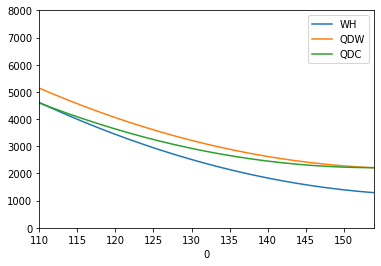

In [373]:
test_1.plot(xlim=(110,154),ylim=(0,8000))

In [370]:
i_1 = "BS"
tar_ = "profit_r"
d_ = 0.3
s_ = 0.6
gap_ = 1
test_2 = para_all()

In [371]:
s_para(d_,s_)

(110.71428571428571, 153.64576885775466)

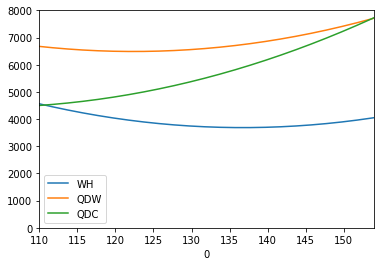

In [372]:
test_2.plot(xlim=(110,154),ylim=(0,8000))

In [346]:
i_1 = "BS"
tar_ = "profit_r"
d_ = 0.3
s_ = 0.6
gap_ = 1
test_ = para_all()

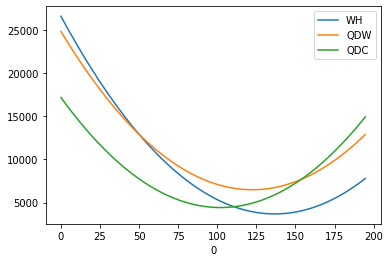

In [347]:
test_.plot()

In [349]:
s_para(d_,s_)

(110.71428571428571, 153.64576885775466)

In [350]:
i_1 = "BS"
tar_ = "profit_all"
d_ = 0.3
s_ = 0.6
gap_ = 1
test_ = para_all()

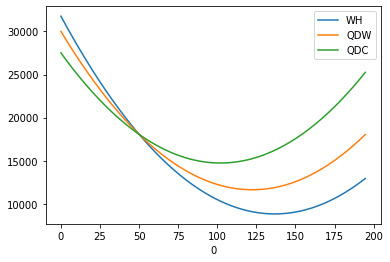

In [351]:
test_.plot()

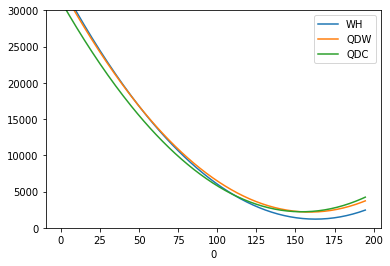

In [320]:
df_iter_all2.plot(ylim=(0,30000))

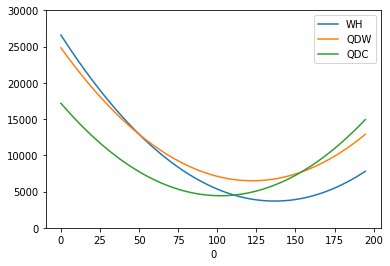

In [312]:
df_iter_all2.plot(ylim=(0,30000))

In [254]:
i_1 = "BS"
tar_ = "profit_all"
d_ = 0.3
s_ = 0.6


In [255]:
all_ = []
for s_can in iter_1:
    wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_12 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [256]:
all_ = []
for s_can in iter_2:
    wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_22 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [257]:
all_ = []
for s_can in iter_3:
    wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_32 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [258]:
all_ = []
for s_can in iter_4:
    wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_42 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [259]:
df_iter_all2 = pd.concat([df_iter_12,df_iter_22,df_iter_32,df_iter_42])

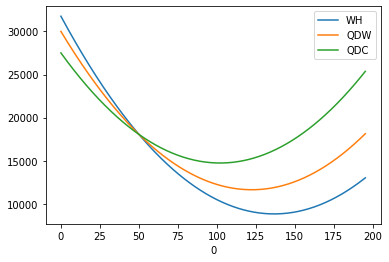

In [260]:
df_iter_all2.plot()

In [321]:
i_1 = "BS"
tar_ = "q_d"



In [322]:
all_ = []
for s_can in iter_1:
    wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_12 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [323]:
all_ = []
for s_can in iter_2:
    wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_22 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [324]:
all_ = []
for s_can in iter_3:
    wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_32 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [325]:
all_ = []
for s_can in iter_4:
    wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_42 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [326]:
df_iter_alld = pd.concat([df_iter_12,df_iter_22,df_iter_32,df_iter_42])

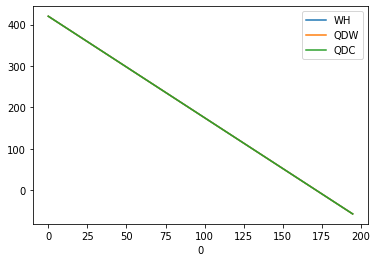

In [327]:
df_iter_alld.plot()

In [328]:
i_1 = "BS"
tar_ = "q_t"



In [329]:
all_ = []
for s_can in iter_1:
    wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_12 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [330]:
all_ = []
for s_can in iter_2:
    wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_22 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [331]:
all_ = []
for s_can in iter_3:
    wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_32 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [332]:
all_ = []
for s_can in iter_4:
    wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_42 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [333]:
df_iter_allt = pd.concat([df_iter_12,df_iter_22,df_iter_32,df_iter_42])

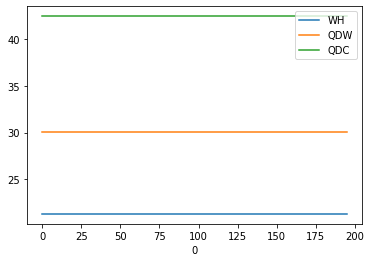

In [334]:
df_iter_allt.plot()

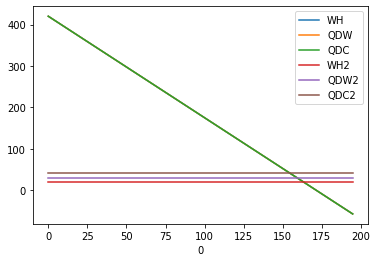

In [336]:
df_iter_alld.merge(df_iter_allt.rename(columns={"WH":"WH2","QDW":"QDW2","QDC":"QDC2"}),how="inner",left_index=True,right_index=True).plot()

In [304]:
s_para(0.3,0.6)

(110.71428571428571, 153.64576885775466)

In [276]:
i_1 = "BS"
tar_ = "p"
d_ = 0.3
s_ = 0.6


In [277]:
all_ = []
for s_can in iter_1:
    wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_12 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [278]:
all_ = []
for s_can in iter_2:
    wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_22 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [279]:
all_ = []
for s_can in iter_3:
    wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_32 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [280]:
all_ = []
for s_can in iter_4:
    wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
    all_can = [s_can,wh_can,qdw_can,qdc_can]
    all_.append(all_can)
df_iter_42 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

In [281]:
df_iter_all2 = pd.concat([df_iter_12,df_iter_22,df_iter_32,df_iter_42])

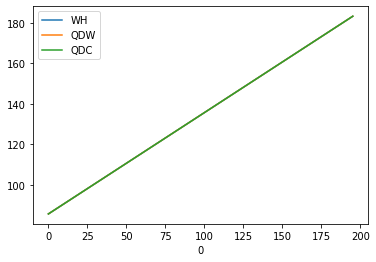

In [282]:
df_iter_all2.plot()

In [376]:
UN_BD_QDC

,1
0,
p,-(-alpha + beta*s)/(2*beta)
w,alpha/beta
epsilon,1/beta
q_d,-(alpha + beta*s)*(delta_d - 1)/2
q_nd,-(-alpha + beta*c)/2
q_t,(-alpha + beta*c)*(delta_s - 1)/2
t,(alpha + beta*c)/(2*beta)
profit_r,-(alpha**2*delta_d - alpha**2*delta_s + 2*alph...
profit_s,-(-alpha + beta*c)**2*(delta_s - 1)/(4*beta)


In [396]:
i_1 = "BS"
tar_ = "t"
d_ = 0.3
s_ = 0.6
gap_ = 1
test_t = para_all().rename(columns={"WH":"t_WH","QDW":"t_QDW","QDC":"t_QDC"})

In [ ]:
test_t.plot()

In [397]:
i_1 = "BS"
tar_ = "q_d"
d_ = 0.3
s_ = 0.6
gap_ = 1
test_d = para_all().rename(columns={"WH":"d_WH","QDW":"d_QDW","QDC":"d_QDC"})

In [398]:
i_1 = "BS"
tar_ = "q_t"
d_ = 0.3
s_ = 0.6
gap_ = 1
test_s = para_all().rename(columns={"WH":"s_WH","QDW":"s_QDW","QDC":"s_QDC"})

In [399]:
i_1 = "BS"
tar_ = "q_nd"
d_ = 0.3
s_ = 0.6
gap_ = 1
test_nd = para_all().rename(columns={"WH":"nd_WH","QDW":"nd_QDW","QDC":"nd_QDC"})

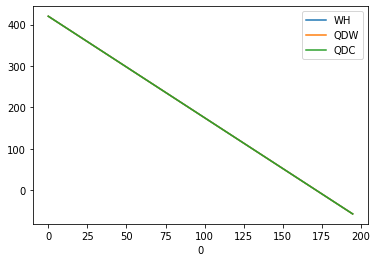

In [391]:
test_d.plot()

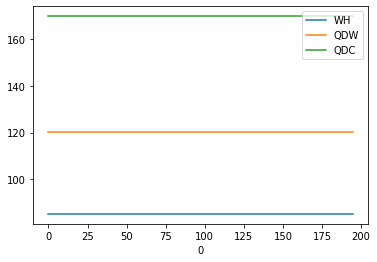

In [392]:
test_s.plot()

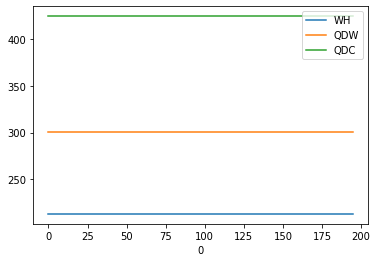

In [389]:
test_nd.plot()

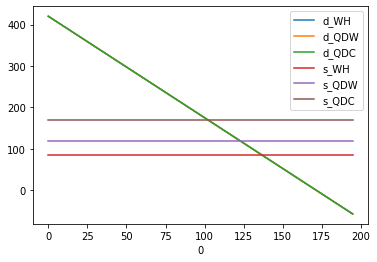

In [401]:
test_all = pd.concat([test_d,test_s],axis=1)
test_all.plot()

# DD, BD

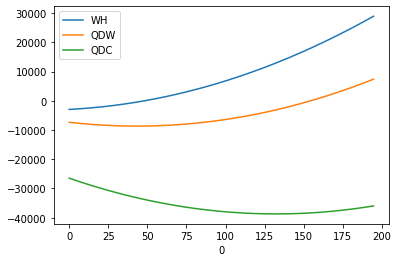

In [406]:
s_para(d_,s_)[0]

110.71428571428571

In [407]:
s_para(d_,s_)[1]

153.64576885775466

In [415]:
def para_all_2():
    #iter_1 = np.arange(-s_para(d_,s_)[1]-30,-s_para(d_,s_)[1],gap_)
    #iter_2 = np.arange(-s_para(d_,s_)[1],-s_para(d_,s_)[0],gap_)
    iter_1 = np.arange(-c_,0,gap_)
    iter_2 = np.arange(0,s_para(d_,s_)[0],gap_)
    all_ = []
    for s_can in iter_1:
        wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
        all_can = [s_can,wh_can,qdw_can,qdc_can]
        all_.append(all_can)
    df_iter_12 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

    all_ = []
    for s_can in iter_2:
        wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can)
        all_can = [s_can,wh_can,qdw_can,qdc_can]
        all_.append(all_can)
    df_iter_22 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

    df_iter_all2 = pd.concat([df_iter_12,df_iter_22])
    return df_iter_all2

In [418]:
i_1 = "DD"
tar_ = "profit_r"
d_ = 0.6
s_ = 0.3
c_ = 50
gap_ = 1
test_r = para_all_2()#.rename(columns={"WH":"t_WH","QDW":"t_QDW","QDC":"t_QDC"})

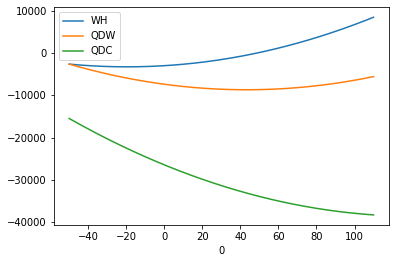

In [423]:
test_r.plot()

In [424]:
i_1 = "DD"
tar_ = "profit_r"
d_ = 0.9
s_ = 0.3
c_ = 50
gap_ = 1
test_r2 = para_all_2()#.rename(columns={"WH":"t_WH","QDW":"t_QDW","QDC":"t_QDC"})

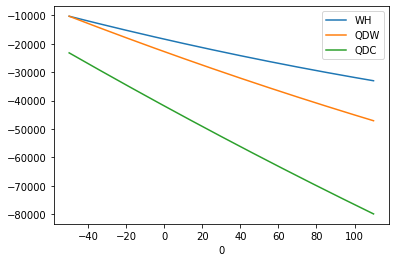

In [425]:
test_r2.plot()

In [467]:
i_1 = "DD"
tar_ = "profit_r"
d_ = 0.6
s_ = 0.3
c_ = 90
gap_ = 1
test_r3 = para_all_2()#.rename(columns={"WH":"t_WH","QDW":"t_QDW","QDC":"t_QDC"})

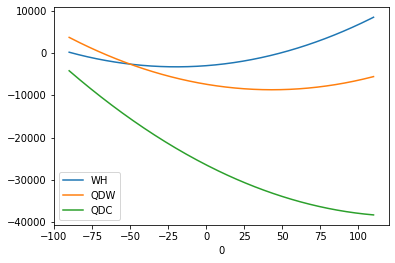

In [469]:
test_r3.plot()

In [428]:
i_1 = "DD"
tar_ = "profit_s"
d_ = 0.6
s_ = 0.3
c_ = 50
gap_ = 1
test_s = para_all_2()#.rename(columns={"WH":"t_WH","QDW":"t_QDW","QDC":"t_QDC"})

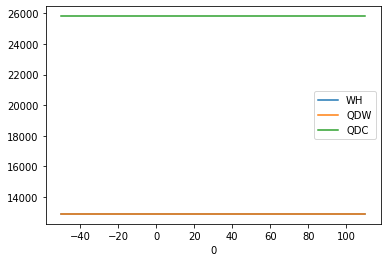

In [430]:
test_s.plot()

In [432]:
i_1 = "DD"
tar_ = "profit_all"
d_ = 0.6
s_ = 0.3
c_ = 50
gap_ = 1
test_all = para_all_2()#.rename(columns={"WH":"t_WH","QDW":"t_QDW","QDC":"t_QDC"})

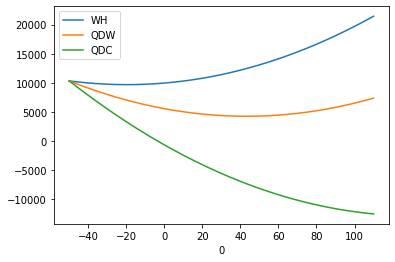

In [433]:
test_all.plot()

In [434]:
i_1 = "DD"
tar_ = "profit_all"
d_ = 0.3
s_ = 0.1
c_ = 50
gap_ = 1
test_all = para_all_2()#.rename(columns={"WH":"t_WH","QDW":"t_QDW","QDC":"t_QDC"})

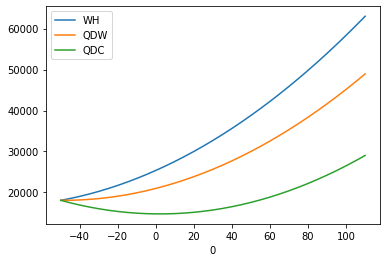

In [435]:
test_all.plot()

In [436]:
i_1 = "DD"
tar_ = "profit_all"
d_ = 0.9
s_ = 0.1
c_ = 50
gap_ = 1
test_all = para_all_2()#.rename(columns={"WH":"t_WH","QDW":"t_QDW","QDC":"t_QDC"})test_all.plot()

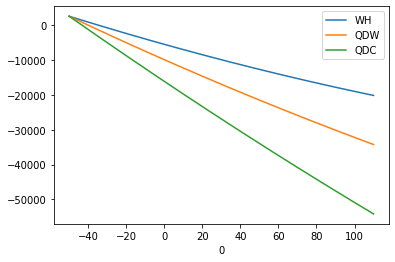

In [437]:
test_all.plot()

In [464]:
i_1 = "DD"
tar_ = "q_d"
d_ = 0.6
s_ = 0.3
c_ = 90
gap_ = 1
test_qd = para_all_2().rename(columns={"WH":"d_WH","QDW":"d_QDW","QDC":"d_QDC"})

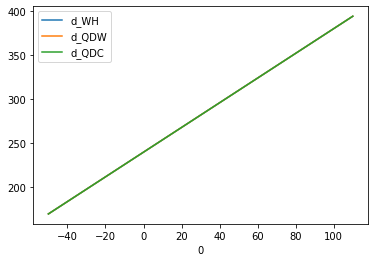

In [444]:
test_qd.plot()

In [465]:
i_1 = "DD"
tar_ = "q_t"
d_ = 0.6
s_ = 0.3
c_ = 90
gap_ = 1
test_qt = para_all_2()#.rename(columns={"WH":"t_WH","QDW":"t_QDW","QDC":"t_QDC"})

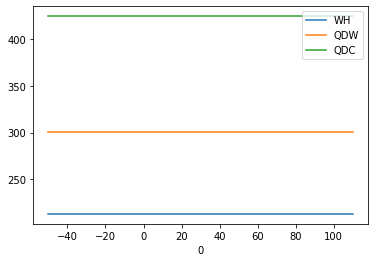

In [441]:
test_qt.plot()

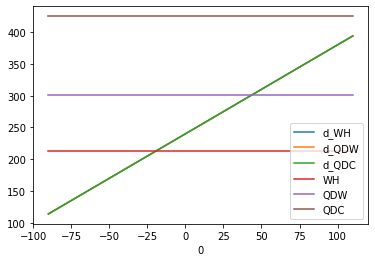

In [466]:
pd.concat([test_qd,test_qt],axis=1).plot()

In [446]:
i_1 = "DD"
tar_ = "p"
d_ = 0.6
s_ = 0.3
c_ = 50
gap_ = 1
test_price = para_all_2()#.rename(columns={"WH":"t_WH","QDW":"t_QDW","QDC":"t_QDC"})

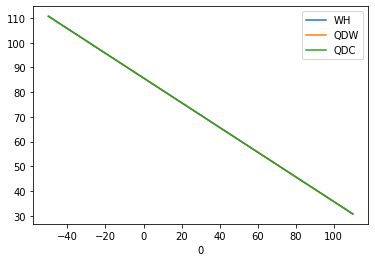

In [447]:
test_price.plot()

# BD

In [448]:
i_1 = "BD"
tar_ = "profit_r"
d_ = 0.6
s_ = 0.3
c_ = 50
gap_ = 1
test_r = para_all_2()#.rename(columns={"WH":"t_WH","QDW":"t_QDW","QDC":"t_QDC"})

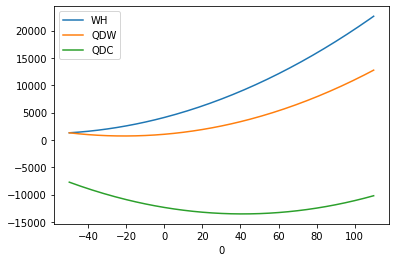

In [449]:
test_r.plot()

In [451]:
i_1 = "BD"
tar_ = "q_d"
d_ = 0.6
s_ = 0.3
c_ = 50
gap_ = 1
test_qd = para_all_2().rename(columns={"WH":"d_WH","QDW":"d_QDW","QDC":"d_QDC"})

In [452]:
i_1 = "BD"
tar_ = "q_t"
d_ = 0.6
s_ = 0.3
c_ = 50
gap_ = 1
test_qt = para_all_2()#.rename(columns={"WH":"t_WH","QDW":"t_QDW","QDC":"t_QDC"})

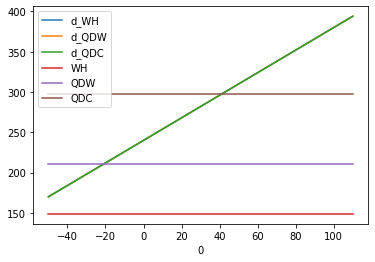

In [453]:
pd.concat([test_qd,test_qt],axis=1).plot()

In [454]:
i_1 = "BD"
tar_ = "profit_r"
d_ = 0.9
s_ = 0.3
c_ = 50
gap_ = 1
test_r = para_all_2()#.rename(columns={"WH":"t_WH","QDW":"t_QDW","QDC":"t_QDC"})

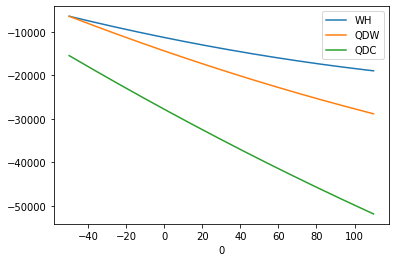

In [455]:
test_r.plot()

In [461]:
i_1 = "BD"
tar_ = "q_d"
d_ = 0.9
s_ = 0.3
c_ = 90
gap_ = 1
test_qd = para_all_2().rename(columns={"WH":"d_WH","QDW":"d_QDW","QDC":"d_QDC"})

In [462]:
i_1 = "BD"
tar_ = "q_t"
d_ = 0.9
s_ = 0.3
c_ = 90
gap_ = 1
test_qt = para_all_2()#.rename(columns={"WH":"t_WH","QDW":"t_QDW","QDC":"t_QDC"})

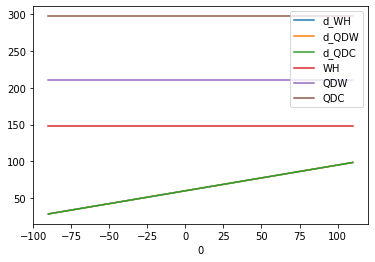

In [463]:
pd.concat([test_qd,test_qt],axis=1).plot()